In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

## Age, water temperature, length of fish


    R J Freund and P D Minton,
    Regression Methods,
    Dekker, 1979, page 111.

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991, page 305,
    ISBN 0-12-656460-4.

####  Discussion:

    The length of a species of fish is to be represented as a function
    of the age and water temperature.  The fish are kept in tanks
    at 25, 27, 29 and 31 degrees Celsius.  After birth, a test specimen
    is chosen at random every 14 days and its length measured.

#### Modeling:

    There are 44 rows of data.  The data include:

      I,  the index;
      A1, the age of the fish;
      A2, the water temperature in degrees Celsius;
      B,  the length of the fish.

    We seek a model of the form:

      B = A1 * X1 + A2 * X2

#### Fonte: http://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html

In [2]:
data = pd.read_csv(
    'age_water_temperature_length_of_fish.txt',
    delimiter=',', header=0, index_col=0,
    names=['age', 'water_temperature', 'length']
)
data.head()

,age,water_temperature,length
1,14,25,620
2,28,25,1315
3,41,25,2120
4,55,25,2600
5,69,25,3110


In [3]:
data = data.sort_values('age')
data[['age', 'length']].iloc[:10, :]

,age,length
1,14,620
23,14,590
12,14,625
34,14,590
24,28,1305
35,28,1205
13,28,1215
2,28,1315
25,41,2140
36,41,1915


No início da vida, é natural que a relação $ idade \times tamanho $ seja algo como crescente, proporcional, **linear** . Vejamos:

Text(0,0.5,'fish length')

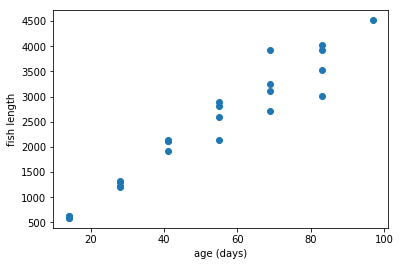

In [4]:
x = data['age']
y = data['length']

x_train = x[:25]
y_train = y[:25]

x_test = x[25:]
y_test = y[25:]

plt.scatter(x_train,y_train)
plt.xlabel('age (days)')
plt.ylabel('fish length')

Ora, deve haver uma relação da forma 

$y = \alpha \cdot x + \beta$ 

onde

$x = idade$, $y = tamanho$,
$\alpha$ e $\beta$ coeficientes a determinar.

Quais os valores exatos de $\alpha$ e $\beta$ ?

Calculemos:

In [5]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train[:, np.newaxis], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
alpha = regressor.coef_[0]
beta = regressor.intercept_
alpha,beta

(45.039958742309196, 62.790874436693684)

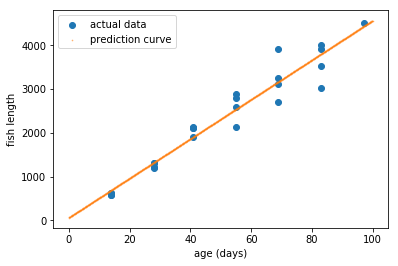

In [94]:
x_predicted = np.linspace(0,100, 1000)
y_predicted = alpha*x_predicted + beta

plt.scatter(x_train,y_train, label='actual data')
plt.scatter(x_predicted, y_predicted, label='prediction curve', s=.5, alpha=.5)
plt.xlabel('age (days)')
plt.ylabel('fish length')
plt.legend()

## Do we have a good model ?

##### Absolutely not !!!! 

##### remember our test data:

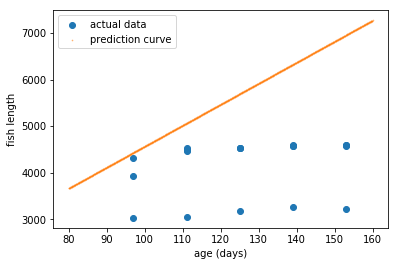

In [96]:
x_predicted = np.linspace(80,160, 1000)
y_predicted = alpha*x_predicted + beta

plt.scatter(x_test,y_test, label='actual data')
plt.scatter(x_predicted, y_predicted, label='prediction curve', s=.5, alpha=.5)
plt.xlabel('age (days)')
plt.ylabel('fish length')
plt.legend()

O gráfico inteiro:

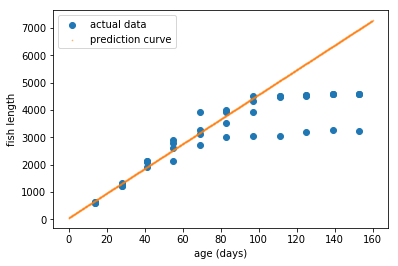

In [10]:
x_predicted = np.linspace(0,160, 1000)
#y_predicted = alpha*x_predicted + beta

# The above gives the same result as below
y_predicted = regressor.predict(x_predicted[:, np.newaxis])

plt.scatter(x,y, label='actual data')
plt.scatter(x_predicted, y_predicted, label='prediction curve', s=.5, alpha=.5)
plt.xlabel('age (days)')
plt.ylabel('fish length')
plt.legend()

A regressão linear não se limita a uma única variável. Podemos usar também a variável $tempertura$, usando um modelo da forma 

$ y_{tamanho} = \alpha_1 \cdot x_{idade} + \alpha_2 \cdot x_{temperatura} + \beta$

Nesse caso, o gráfico será um plano!

In [14]:
X = np.array(data[['age', 'water_temperature']])
y = data['length']

X[:10,:]

array([[14, 25],
       [14, 29],
       [14, 27],
       [14, 31],
       [28, 29],
       [28, 31],
       [28, 27],
       [28, 25],
       [41, 29],
       [41, 31]])

In [15]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0.5,0,'tamanho')

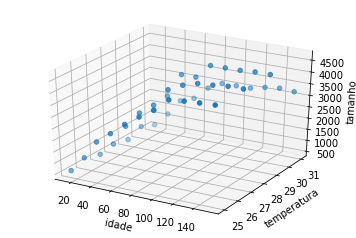

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs, ys = X.T
zs = y

ax.scatter(xs, ys, zs)
ax.set_xlabel('idade')
ax.set_ylabel('temperatura')
ax.set_zlabel('tamanho')

In [22]:
a1, a2 = regressor.coef_
b = regressor.intercept_
b

3904.266016751819

In [ ]:
a1

<IPython.core.display.Javascript object>


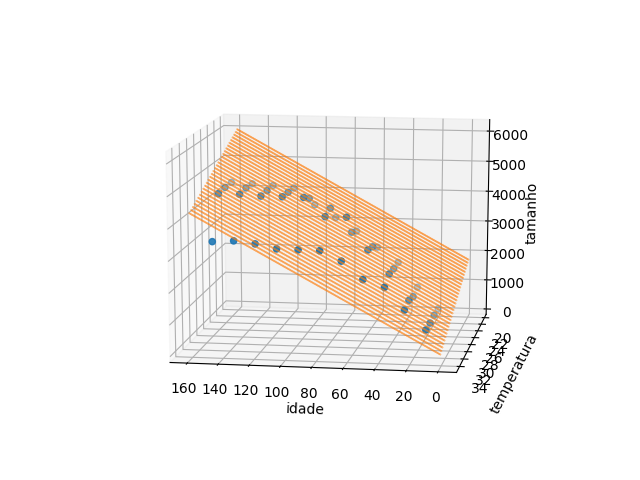

Text(0.5,0,'tamanho')

In [23]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs, ys = X.T
zs = y

x_predicted = np.linspace(0,160,100)
y_predicted = np.linspace(20,35)

Xp = np.mgrid[0:160:.5, 20:35:.5].reshape(2,-1).T

z_predicted = regressor.predict(Xp)
xp, yp = Xp.T

ax.scatter(xs, ys, zs)
ax.scatter(xp, yp, z_predicted, s=.1, alpha=.7)
ax.set_xlabel('idade')
ax.set_ylabel('temperatura')
ax.set_zlabel('tamanho')

more refs:
    
https://github.com/lucko515/regression-python/blob/master/Boston%20and%20Diabetes%20datasets%20Regression/boston_diabetes_regression.ipynb